# Kernel regression

**What you will learn today**: You will learn how to implement kernel regression. First we analyze a synthetic dataset: you will build the feature map associated with different kernels and we see how the learning performance can be different. As always after having understood the theoretical insights we step on to real-dataset problem: you can play using our dear friend sklearn to implement Kernel Ridge Regression, with a kernel of your choice.

**Important note!** There are 2 evauated questions! Make sure to answer them to get the points.

# 1) KRR from scratch 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Remember first lecture?  Let us use pandas for handling synthetic dataset.

In [7]:
data = pd.read_csv(r'C:\Users\nicol\Desktop\inferance\dataTP8.csv')

x,y = np.array(data['X']), np.array(data['Y'])

Let's see how it looks like

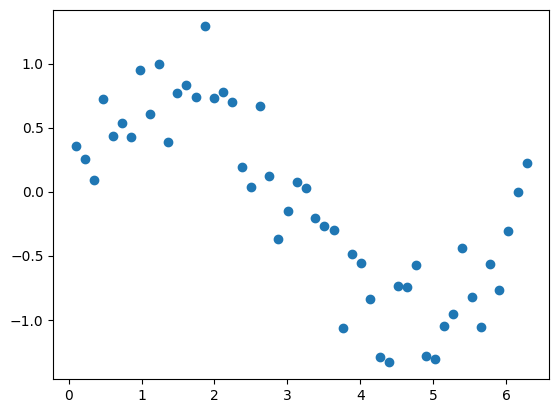

In [8]:
plt.plot(x,y,'o') 

It does not seem a bad idea to use a polynomial fitting here. We have introduced in the theoretical lectures kernel methods: $$K(x,y) = {\phi(x)}^T{\phi(y)}$$

Let us pick for the first part of the analysis a feature map of the form:
$$ \phi_k^{(p)}(x) = x^k  \,\,\,\,\,\,\,\, k=1 \dots p $$

You may have studied this under the name *linear basis regression*.

The tools we need once we have mapped the datapoints in feature space are the usual one of linear regression as we know and all will be straight-forward.
We will study the behaviour as the degree $p$ varies, this will vary the complexity of the fitting model leading us to our usual bias-variance tradeoff consideration.

In [15]:
def build_poly(x, degree, choice='none', gamma=1):  #degree is the maximum degree of the polynomial
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    x_pol = []
    
    for i in range(0,len(x)):                                            #This loop iterates over each element in x. For each x[i], the code will generate polynomial features up to the specified degree.
        x_pol_ele = np.array([x[i]**j for j in range(0,degree+1)])       #This line generates the polynomial features for a single element x[i]. It creates a list of powers of x[i] from 0 to degree.
        x_pol.append(x_pol_ele)
    return np.array(x_pol)                                               #This line converts the list of polynomial features into a numpy array and returns it.

def ridge_regression(y, X, lambda_):                                     #RR, returnd the weights and the mse
    """implement ridge regression."""
    Xt = np.transpose(X)
    I = np.eye(len(Xt))
    w =  np.linalg.solve(Xt@X + (2*lambda_*len(y))*I,Xt@y)
    mse = (1/(2*len(y)))*np.sum((y-np.matmul(X,w))**2)
    return mse,w

def polynomial_regression(x,y,degrees,lambda_):                        #This function, polynomial_regression, performs polynomial regression using Ridge Regression for different polynomial degrees
    num = len(degrees)                                                 #To determine the number of subplots
    fig, axs = plt.subplots(num,figsize=(15,15)); 
    i =-1                                                              #i = -1: Initializes a counter i that keeps track of the current subplot.
    for degree in (degrees):                                           #for degree in degrees: Loops through each degree in the degrees list.
        i+=1;                                                          #Increments the subplot counter for each degree.
        phi = build_poly(x, degree)                                    #Generates the polynomial features for the current degree.
         
        mse , weights = ridge_regression(y, phi,lambda_)
        rmse = np.sqrt(2*mse)

        print("Processing {j}th experiment, degree={d}, rmse={loss}".format(
              j=i + 1, d=degree, loss=rmse))
        # print(weights)
        # plot fit
        # fhat = np.dot(phi,weights)
        xvals = np.arange(min(x) - 0.1, max(x) + 0.1, 0.1)                
        phi = build_poly(xvals, degree) ; fhat = np.dot(phi,weights)
        axs[i].plot(x,
            y, 'o',label=f'Degree={degree} -- Data')
        axs[i].plot(xvals,
            fhat,label=f'Fit')
        axs[i].set_ylim([-1.4,1.4])
        axs[i].legend()
    # plt.tight_layout()
    

Processing 1th experiment, degree=5, rmse=0.2545435645040046
Processing 2th experiment, degree=12, rmse=0.24434768553799785
Processing 3th experiment, degree=20, rmse=0.24303972823265924
Processing 4th experiment, degree=50, rmse=0.22537979409603537
Processing 5th experiment, degree=80, rmse=0.21298803994418225
Processing 6th experiment, degree=120, rmse=0.2127765897384887
Processing 7th experiment, degree=160, rmse=0.24443693875953804


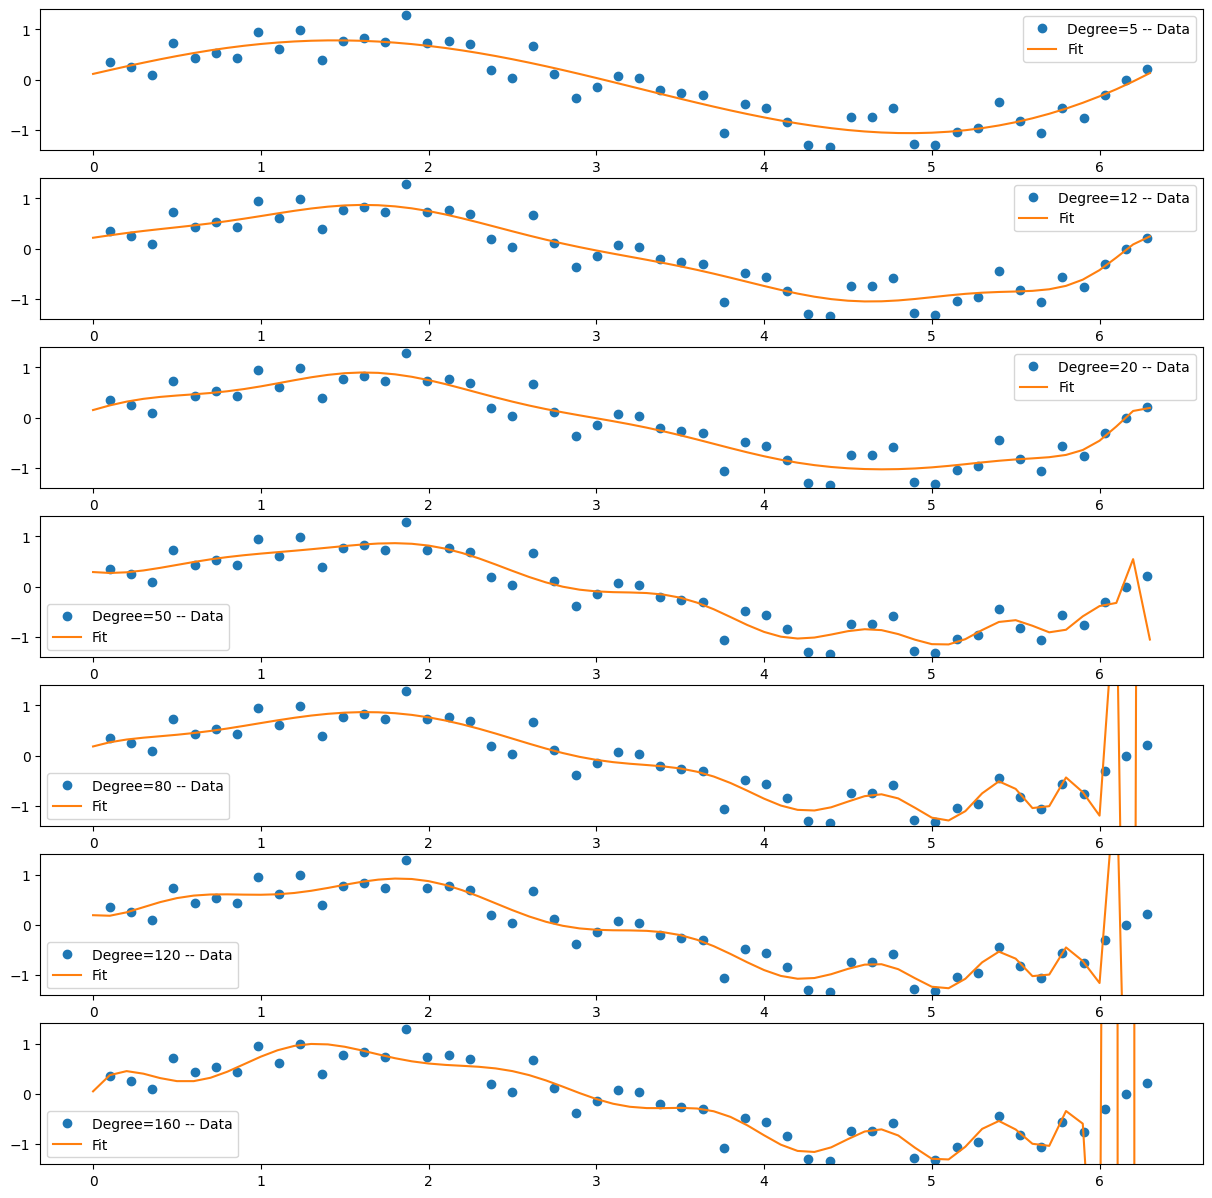

In [16]:
degrees = [5,  12, 20,50,80,120,160] ; lambda_ = 10e-6
polynomial_regression(x,y,degrees,lambda_)

We clearly see that by choosing a value of the degree too high we start to have bad fitting (i.e. overfitting). This feature map is not building a good kernel for studying the data.

It is interesting to understand if we can build another feature map, always in a polynomial fashion, that is able to having good learning rates.

First let's introduce some functions to split data in training and testing dataset to evaluate the performance of the model.

In [18]:
def split_data(x, y, ratio, seed=1):
    # set seed
    np.random.seed(seed)
    # ***************************************************
    index = np.arange(0,len(x))
    index_train = np.random.choice(index, int(ratio*len(x)), replace=False)
    
    training_x = x[index_train]
    training_y = y[index_train]
    test_x = x[[i for i in range(len(x)) if i not in index_train]]
    test_y = y[[i for i in range(len(y)) if i not in index_train]]
    
    return training_x, training_y, test_x, test_y

## Exercise
* Implement kernel regression with the feature map parametrized by $\gamma$ which we encode with the codework *rbf*: 

$$ \phi_k^{(p)}(x) = e^{\frac{-x^2}{\gamma}}\frac{x^k}{k!}  \,\,\,\,\,\,\,\, k=1 \dots p $$
* Study the behaviour as a function of $\lambda$ of the learning curves (test error and training error) and compare with what you would see with the previous feature map.
* What do you conclude?

Let us implement first the function for finding the learning curves of KRR.

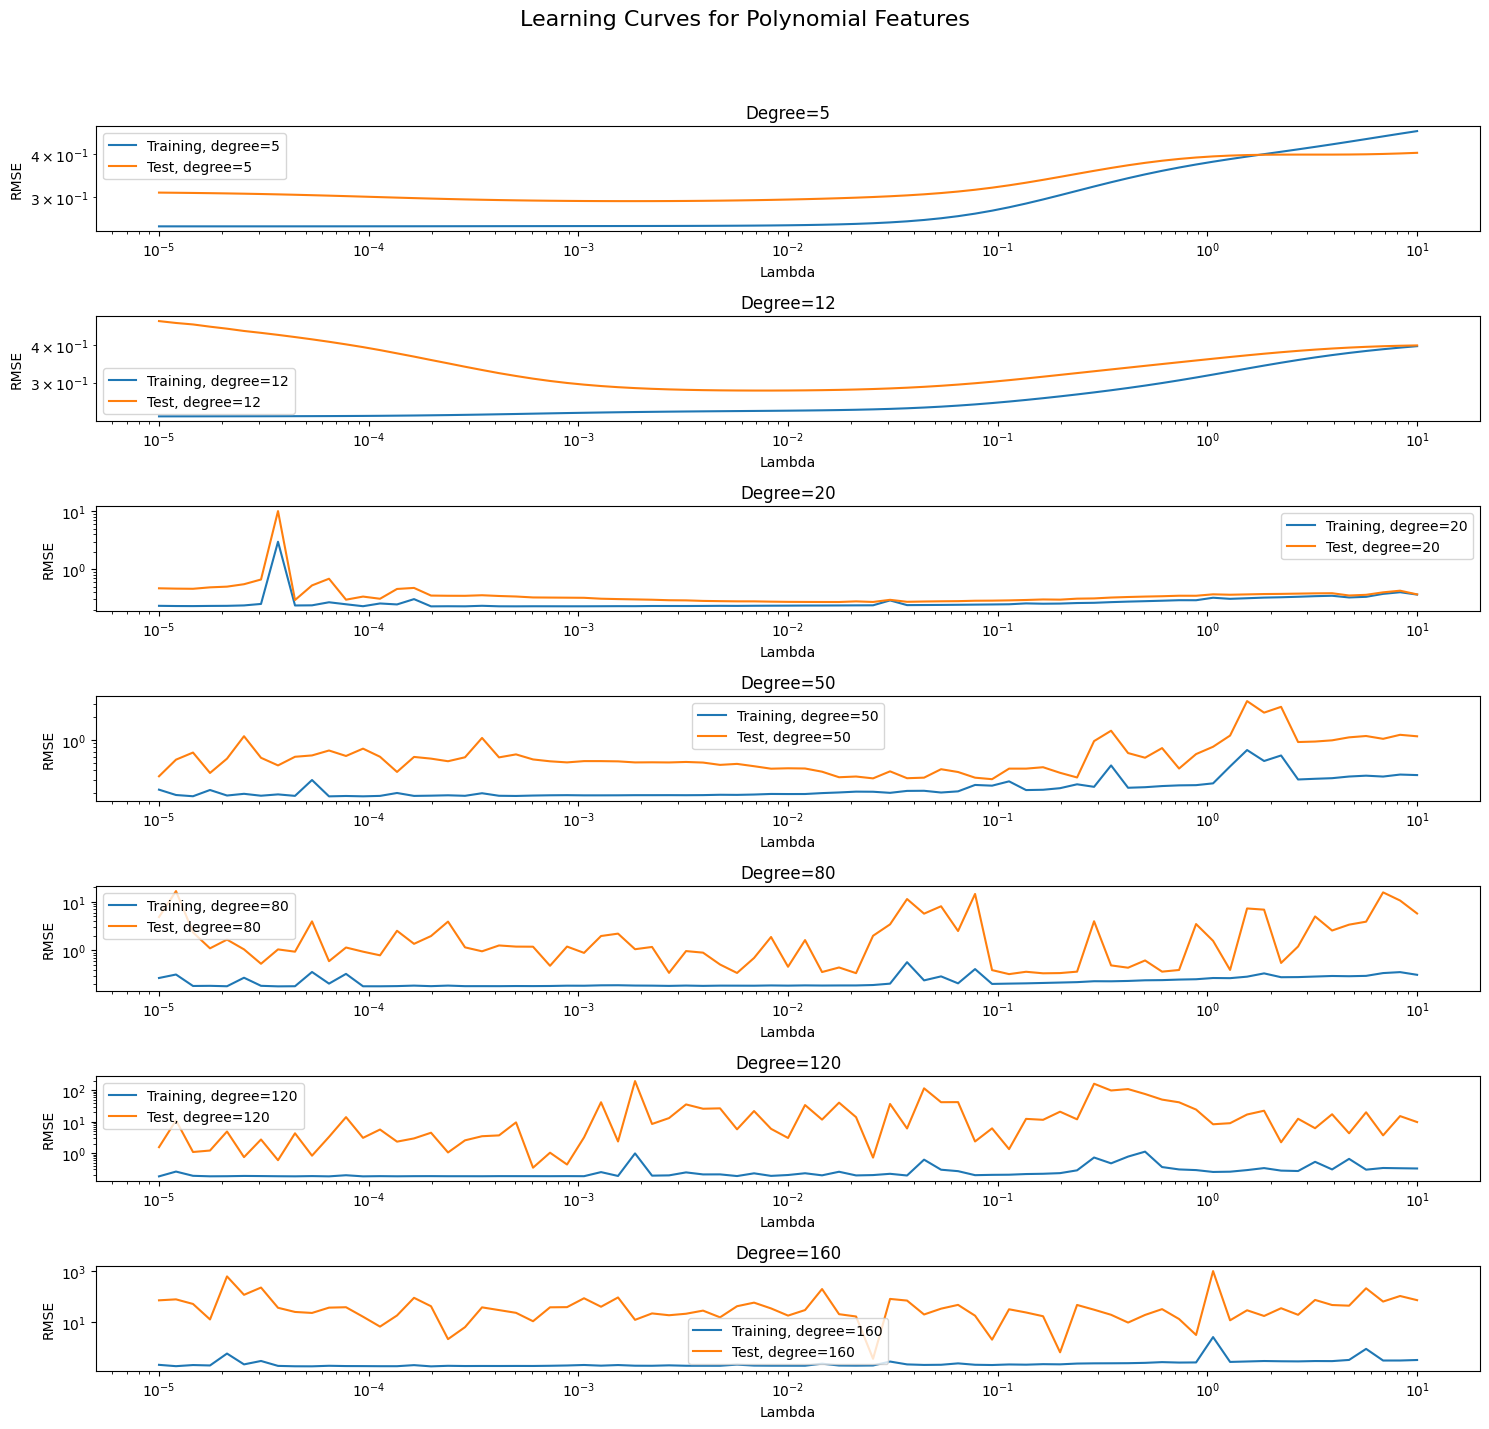

In [ ]:
def build_poly(x, degree,choice='none',gamma=1):   #Changed the function to include the choice of basis functions, RBF to be exact
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    x_pol = []
    
    for i in range(0,len(x)):
        x_pol_ele = []
        if choice == "rbf":
          x_pol_ele = np.exp(-x[i]*x[i]/gamma)*np.array([x[i]**j/(np.math.factorial(j)*np.math.sqrt(gamma**j)) for j in range(0,degree+1)])
        else:
          x_pol_ele = np.array([x[i]**j for j in range(0,degree+1)])
        x_pol.append(x_pol_ele)
    return np.array(x_pol)

def RR_learning_curves(x, y, ratio, degree, seed, lambdas, choice, gamma):
    
    training_x,training_y,test_x,test_y = split_data(x, y, ratio, seed)

    phi_train = build_poly(training_x, degree, choice, gamma)
    phi_test = build_poly(test_x, degree, choice, gamma)

    rmse_train = []
    rmse_test = []
    for lambda_ in lambdas:
        mse_train,w = ridge_regression(training_y, phi_train, lambda_)
        rmse_train.append(np.sqrt(2*mse_train))
        
        mse_test = (1/(2*len(test_y)))*np.sum((test_y-np.matmul(phi_test,w))**2)
        rmse_test.append(np.sqrt(2*mse_test))
    return rmse_train, rmse_test
 
gamma = 0.1
seed = 0
split_ratio = 0.75
choice = 'none'  # Using polynomial features
lambdas = np.logspace(-5, 1, 75)
degrees = [5,  12, 20,50,80,120,160]

fig, ax = plt.subplots(len(degrees), figsize=(15, 15))
fig.suptitle("Learning Curves for Polynomial Features", fontsize=16)

for i, degree in enumerate(degrees):
    rmse_train, rmse_test = RR_learning_curves(x, y, split_ratio, degree, seed, lambdas, choice, gamma)
    ax[i].plot(lambdas, rmse_train, label=f"Training, degree={degree}")
    ax[i].plot(lambdas, rmse_test, label=f"Test, degree={degree}")
    ax[i].legend()
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_title(f"Degree={degree}")
    ax[i].set_xlabel("Lambda")
    ax[i].set_ylabel("RMSE")
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_119688\640000667.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  x_pol_ele = np.exp(-x[i]*x[i]/gamma)*np.array([x[i]**j/(np.math.factorial(j)*np.math.sqrt(gamma**j)) for j in range(0,degree+1)])


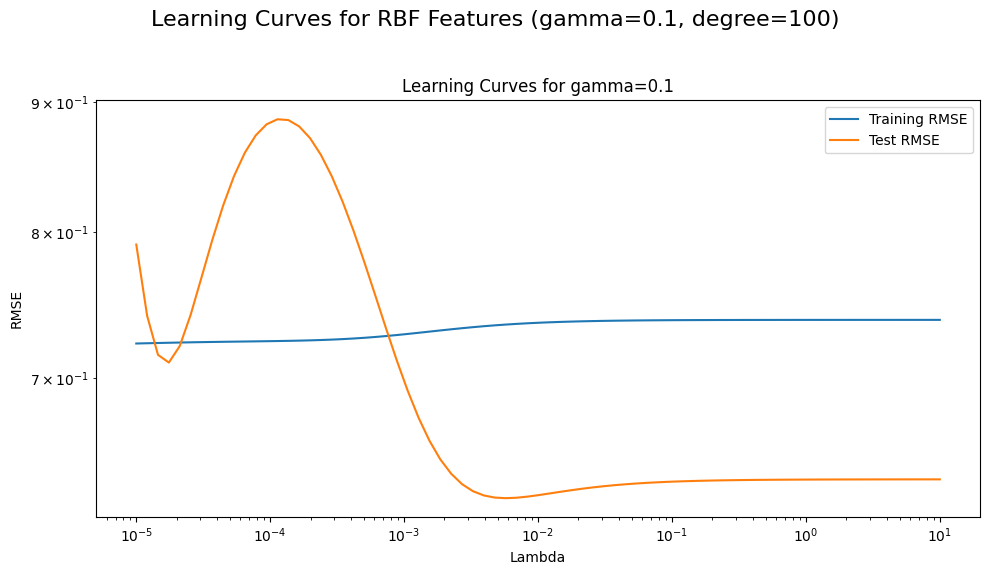

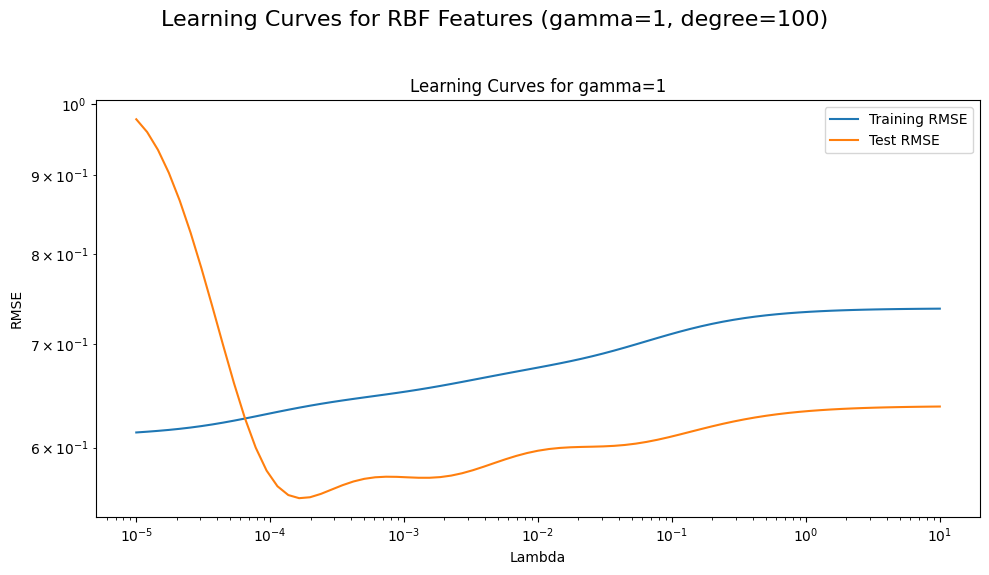

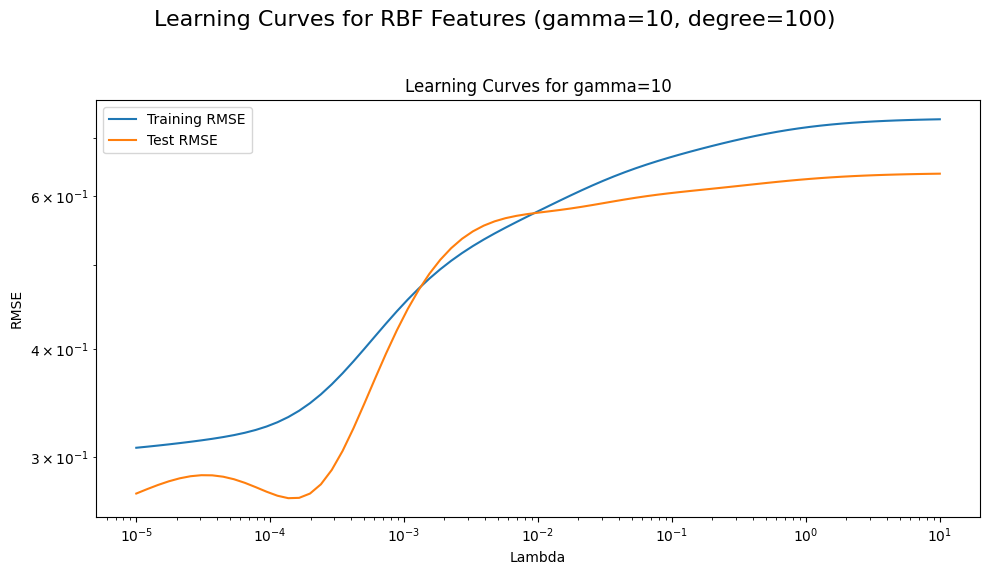

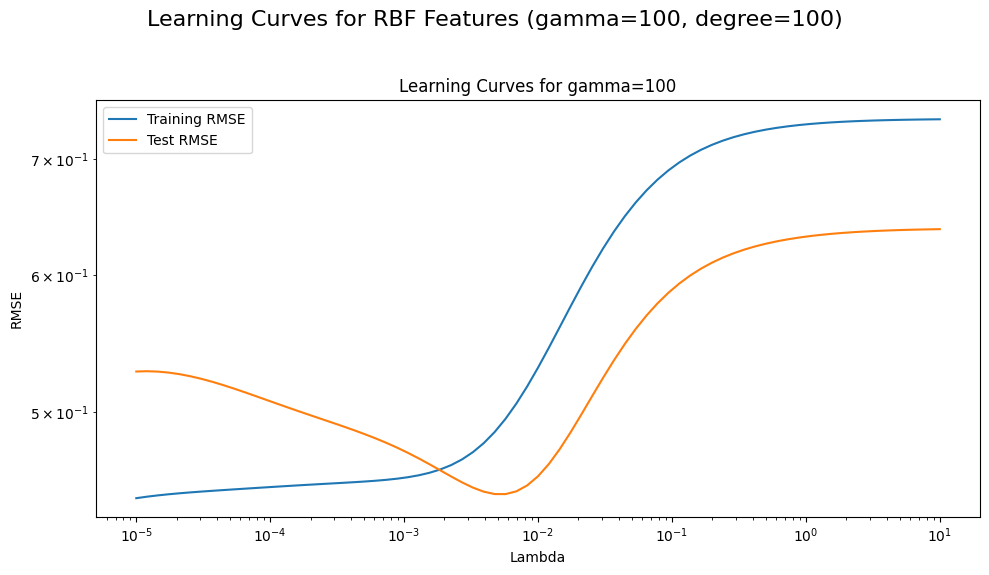

In [ ]:
gamma_values = [0.1, 1, 10, 100]  
degree = 100  
seed = 0
split_ratio = 0.75
choice = 'rbf'  
lambdas = np.logspace(-5, 1, 75)  

for gamma in gamma_values:
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(f"Learning Curves for RBF Features (gamma={gamma}, degree={degree})", fontsize=16)
    
    rmse_train, rmse_test = RR_learning_curves(x, y, split_ratio, degree, seed, lambdas, choice, gamma)
    
    ax.plot(lambdas, rmse_train, label="Training RMSE")
    ax.plot(lambdas, rmse_test, label="Test RMSE")
    ax.legend()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f"Learning Curves for gamma={gamma}")
    ax.set_xlabel("Lambda")
    ax.set_ylabel("RMSE")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Seems like wwe have no overfitting now.

# 2) Kernel methods using Sklearn 

We have seen how to build Kernel Ridge Regression (KRR) from scratch starting from the feature map. The idea to map datapoint in an higher dimensional space (i.e. kernel trick) can be used also in classification task. We will consider again our old friend MNIST, we will consider SVC (Support Vector Classification). We will see that, at stake with previous lecture, *SVC* will accept the parameter *kernel* to choose in which space mapping our datapoints.

In [39]:
import time

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 9000 # 60000
test_size = 1500 # 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X = np.array(X)[:train_size+test_size]
y = np.array(y)[:train_size+test_size]


Automatically created module for IPython interactive environment


Let's plot an image to see how it looks like with plt.imshow.

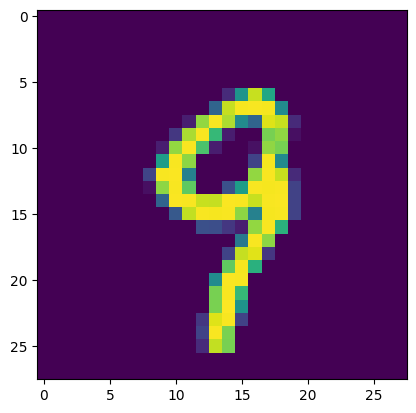

In [40]:
plt.imshow(X[6542,:].reshape(28,28))

We shuffle the data and we do the test-train splitting.

In [41]:
# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

### Exercise [EVALUATED]
Use `sklearn.svm.SVC` to classify the MNIST dataset. Use the following kernels: `linear`, `poly`, `rbf`, `sigmoid`. For each kernel do a cross-validation to find the best hyperparameters. Use `GridSearchCV` to do that.
Finally return the bes global model and the best kernel for the dataset.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

#Here I define the parameters for the grid search, C is the regularzation parameter (well...the inverse), gamma is the kernel coefficient for 'rbf', 'poly' and 'sigmoid' kernels, and degree is the degree of the polynomial kernel.
param_grids = {
    'linear': {'svc__C': [0.1, 1, 10, 100]},
    'poly': {'svc__C': [0.1, 1, 10], 'svc__degree': [2, 3, 4]},
    'rbf': {'svc__C': [0.1, 1, 10], 'svc__gamma': [0.001, 0.01, 0.1, 1]},
    'sigmoid': {'svc__C': [0.1, 1, 10], 'svc__gamma': [0.001, 0.01, 0.1, 1]}
}

#for storing the best estimator and score for each kernel
best_estimators = {}
best_scores = {}

#Grid search for each kernel
for kernel in param_grids.keys():
    #set up the pipeline with a scaler and SVC
    pipeline = Pipeline([
        ('scaler', StandardScaler()),   #scale and normalize the data
        ('svc', SVC(kernel=kernel))     #SVM model
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[kernel], cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    #tore the best estimator and score
    best_estimators[kernel] = grid_search.best_estimator_
    best_scores[kernel] = grid_search.best_score_
    
    print(f"Best parameters for kernel={kernel}: {grid_search.best_params_}")
    print(f"Best cross-validation score for kernel={kernel}: {grid_search.best_score_:.4f}")

#find the best kernel based on cross-validation score
best_kernel = max(best_scores, key=best_scores.get)
best_model = best_estimators[best_kernel]

print(f"\nBest overall kernel: {best_kernel}")
print(f"Best overall model: {best_model}")

#test data accuracy
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy for the best model with kernel='{best_kernel}': {test_accuracy:.4f}")



Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for kernel=linear: {'svc__C': 0.1}
Best cross-validation score for kernel=linear: 0.9124
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for kernel=poly: {'svc__C': 10, 'svc__degree': 2}
Best cross-validation score for kernel=poly: 0.9487
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for kernel=rbf: {'svc__C': 10, 'svc__gamma': 0.001}
Best cross-validation score for kernel=rbf: 0.9383
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for kernel=sigmoid: {'svc__C': 1, 'svc__gamma': 0.001}
Best cross-validation score for kernel=sigmoid: 0.9187

Best overall kernel: poly
Best overall model: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=10, degree=2, kernel='poly'))])
Test accuracy for the best model with kernel='poly': 0.9653


# Backpropagation from scratch

**What will you learn today**: Backpropagation is the fundamental building block of deep learning, as it allows to automatically compute the gradients of any arbitrary compositional function with a similar computational cost than evaluating it. This makes possible to work with arbitrarily complex neural network architectures, composed of many layers, without the need to manually compute their gradients. Backpropagation is already implemented in all high-level deep learning frameworks, e.g. `PyTorch`, and as such, we would hardly ever need to think of how it works. However, it is a very educational exercise to implement it once in your life, and that is precisely what we will do in this exercise! In particular, you will learn to implement and derive the forward and backward pass of a very simple neural network in pure `numpy`. As a bonus, we will also explore how to approximate the non-convex loss landscape of a neural network by a convex one, and we will learn how to use such approximation to derive intuitions about how different design choices affect the network's behaviour.

# 1) Forward pass
To simplify the exercise, we will only work with a simple architecture, consisting of a feedforward neural network with two fully connected layers, i.e., a single-hidden layer MLP.

![simple_mlp](simple_mlp.png)

Mathematically, we can write the feedforward computation as:
$$ x_j^{(1)}=\sigma\left(z_j^{(1)}\right)=\sigma\left(\sum_{i=1}^D w_{i,j}^{(1)} x_i^{(0)}+b_j^{(1)}\right), $$
$$ \hat y =\sigma\left(z_1^{(2)}\right)=\sigma\left(\sum_{i=1}^K w_{i,1}^{(2)} x_i^{(1)}+b_1^{(2)}\right),  $$
where $\sigma(\cdot)$ denotes the sigmoid activation function. In the rest of the exercise, we will use $D=4$, and $K=5$.

We can alternatively write the same computation in vector notation
$$ \bf x^{(1)}=\sigma\left(\bf z^{(1)}\right)=\sigma\left(\bf W^{(1)} \bf x^{(0)}+\bf b^{(1)}\right), $$
$$ \hat y=\sigma\left(z^{(2)}\right)=\sigma\left(\bf {w^{(2)}}^\top \bf x^{(1)}+b^{(2)}\right). $$

In general, we will denote the function computed by the neural network as $f_{\bf w}(\bf x)=\hat y$, and use $\bf w$ to represent the vector of all weights in the architecture.

In [44]:
x = np.array([0.01, 0.02, 0.03, 0.04])
W = {
    "w_1": np.ones((4, 5)),
    "w_2": np.ones(5)
}
y = 1

Then, let's implement the forward pass. If you implement it correctly, you should see that your code can pass the test successfully.

In [66]:
def simple_feed_forward(x, W):
    #hidden layer
    z_1 = np.dot(x, W["w_1"])
    sigma_1 = 1 / (1 + np.exp(-z_1))  #applying sigmoid activation function
    
    #output layer
    z_2 = np.dot(sigma_1, W["w_2"])
    sigma_2 = 1 / (1 + np.exp(-z_2))  #applying sigmoid activation function
    
    return z_1, sigma_1, sigma_2

try:
    expected = 0.93244675427215695
    _, _, yours = simple_feed_forward(x, W)
    assert np.sum((yours - expected) ** 2) < 1e-15
    print("Your implementation is correct!")
except:
    print("Your implementation is not correct.")

Your implementation is correct!


## 2) Backward pass

We now have a working implementation of our network! However, if we want to be able to train it using gradient descent, we need to be able to compute its gradient. Let's do that.

We will use the squared error as our loss function, i.e.,
$$\ell(y,\hat y)=\frac{1}{2}(\hat y-y)^2$$


### Exercise
Evaluate the derivative of $\mathcal{L}(\bf w)=\ell(y, f_{\bf w}(\bf x))$ with respect to $w_{i,1}^{(2)}$ and $w_{i,j}^{(1)}$ for a single training sample $(\bf x, y)$, by following the backpropagation algorithm.

### Exercise [EVALUATED]
Now that we have derived the backward pass analytically, let's implement it in Python!

*Hint*: You might want to slightly change `simple_feed_forward`.


### Backward Pass Derivatives

1. **Loss w.r.t. output**:
   $$
   \frac{\partial \mathcal{L}}{\partial \hat{y}} = -(y - \hat{y})
   $$

2. **Output activation w.r.t. \( z^{(2)} \)**,:
   $$
   \frac{\partial \hat{y}}{\partial z^{(2)}} = \hat{y} (1 - \hat{y})
   $$
   Thus,
   $$
   \frac{\partial \mathcal{L}}{\partial z^{(2)}} = -(y - \hat{y}) \cdot \hat{y} (1 - \hat{y})
   $$
   (I just multiplied the two thanks to the chain rule)
3. **Loss w.r.t. output layer weights \( W^{(2)} \)**:
   $$
   \frac{\partial \mathcal{L}}{\partial W^{(2)}_{i,1}} = \frac{\partial \mathcal{L}}{\partial z^{(2)}} \cdot x^{(1)}_i = -(y - \hat{y}) \cdot \hat{y} (1 - \hat{y}) \cdot x^{(1)}_i
   $$

4. **Loss w.r.t. hidden layer activation \( x^{(1)} \)**:
   $$
   \frac{\partial \mathcal{L}}{\partial x^{(1)}_j} = \frac{\partial \mathcal{L}}{\partial z^{(2)}} \cdot W^{(2)}_j
   $$

5. **Loss w.r.t. hidden layer pre-activation \( z^{(1)} \)**:
   $$
   \frac{\partial \mathcal{L}}{\partial z^{(1)}_j} = \frac{\partial \mathcal{L}}{\partial x^{(1)}_j} \cdot x^{(1)}_j (1 - x^{(1)}_j)
   $$

6. **Loss w.r.t. hidden layer weights \( W^{(1)} \)**:
   $$
   \frac{\partial \mathcal{L}}{\partial W^{(1)}_{i,j}} = \frac{\partial \mathcal{L}}{\partial z^{(1)}_j} \cdot x_i = -(y - \hat{y}) \cdot \hat{y} (1 - \hat{y}) \cdot W^{(2)}_j \cdot x^{(1)}_j (1 - x^{(1)}_j) \cdot x_i
   $$

In [ ]:
import numpy as np

def sigmoid(x):        #Sigmoid activation function, then I use this in the feed forward function
    return 1 / (1 + np.exp(-x))

def simple_feed_forward(x, W):
    z_1 = np.dot(x, W["w_1"])
    sigma_1 = sigmoid(z_1)
    z_2 = np.dot(sigma_1, W["w_2"])
    sigma_2 = sigmoid(z_2)
    
    return z_1, sigma_1, sigma_2

def simple_backpropagation(y, x, W):  

    z_1, sigma_1, sigma_2 = simple_feed_forward(x, W) #feed forward to get the outputs of the hidden and output layers
    
    delta_2 = -(y - sigma_2) * sigma_2 * (1 - sigma_2)  #error in the output layer, similar to above, but with the sigmoid function
    
    delta_W2 = delta_2 * sigma_1 #gradient for w_2
  
    delta_1 = delta_2 * W["w_2"] * sigma_1 * (1 - sigma_1)  #error in the hidden layer
    
    delta_W1 = np.outer(x, delta_1)  #gradient for w_1: since z_1 = x * w_1, the gradient is x * delta_1, usng the outer product ensures that each weight connecting an input feature to a hidden layer neuron gets its gradient calculated.
    
    delta_W = {                  #return the gradients as a directory
        "w_1": delta_W1,
        "w_2": delta_W2
    }
    
    return delta_W

#test values as above
x = np.array([0.01, 0.02, 0.03, 0.04])
W = {
    "w_1": np.ones((4, 5)),  
    "w_2": np.ones(5)        
}
y = 1  

try:
    expected = {
        'w_1': np.array([
            [ -1.06113639e-05,  -1.06113639e-05,  -1.06113639e-05, -1.06113639e-05,  -1.06113639e-05],
            [ -2.12227277e-05,  -2.12227277e-05,  -2.12227277e-05, -2.12227277e-05,  -2.12227277e-05],
            [ -3.18340916e-05,  -3.18340916e-05,  -3.18340916e-05, -3.18340916e-05,  -3.18340916e-05],
            [ -4.24454555e-05,  -4.24454555e-05,  -4.24454555e-05, -4.24454555e-05,  -4.24454555e-05]]),
        'w_2': np.array(
            [-0.00223387, -0.00223387, -0.00223387, -0.00223387, -0.00223387])
    }
    yours = simple_backpropagation(y, x, W)
    assert np.sum(
        [np.sum((yours[key] - expected[key]) ** 2) for key in expected.keys()]) < 1e-15
    print("Your implementation is correct!")
except:
    print("Your implementation is not correct!")

    


Your implementation is correct!


# 3) Bonus: Effect of regularization

One of the first things we learn about neural networks is that their loss landscape is not convex. This means that analyzing how different design choices will affect their performance precisely is generally very hard. Fortunately, however, many times we can get an intuition of the behaviour of a neural network by taking a few approximations. We will now explore one of those. In particular, we will use some simple approximations to explore what is the effect of regularization on the weights of a neural network. 

Let $\bf w$ be the weight vetor of all weights in the neural network, and recall that we do not normally penalize the bias term, so let's ignore it for the rest of our derivations. Furthermore, let $\bf w^\star$ denote a parameter that minimizes the cost function $\mathcal L$ for the given test set (where the cost functions does not include the regularization). We would like to study how the optimal weight changes if we include some regularization.

In order to make the problem tractable, assume that $\mathcal L(\bf w)$ can be locally expanded around the optimal parrameter $\bf w^\star$ in the form
$$\mathcal L(\bf w) =\mathcal L(\bf w^\star)+\frac{1}{2}(\bf w-\bf w^\star)^\top\bf H(\bf w-\bf w^\star),$$
where $\bf H$ denotes the Hessian, whose components are the entries
$$\cfrac{\partial^2 \mathcal{L}}{\partial \bf w_i \partial \bf w_j }$$

Now, let's add a regularization term of the form $\frac{1}{2}\mu\|\bf w\|^2_2$.

## Exercise
1. Show that the optimum weight vector for the regularized problem is given by $$\bf Q(\bf \Lambda+\mu\bf I)^{-1}\bf \Lambda\bf Q^\top \bf w^\star$$ where $\bf H=\bf Q\bf\Lambda\bf Q^\top$ represents the eigenvalue decomposition of the symmetric matrix $\bf H$, i.e., $\bf Q$ is an orthonormal matrix, and $\bf \Lambda$ is a diagonal matrix whose entries are non-negative and decreasing along the diagonal.
2. Show that $(\bf\Lambda+\mu\bf I)^{-1}\bf\Lambda$ is again a diagonal matrix whose $i$-th entry is now $\lambda_i/(\lambda_i+\mu)$.
3. Argue that along the dimensions of the eigenvectors of $\bf H$ that correspond to large eigenvalues, essentially no changes occur in the weights, but that along the dimensions of eigenvectors of very small eigenvalues the weight is drastically decreased. 

1

The regularized cost function becomes:
$
\mathcal{L}_{\text{reg}}(\mathbf{w}) = \mathcal{L}(\mathbf{w}^\star) + \frac{1}{2} (\mathbf{w} - \mathbf{w}^\star)^\top \mathbf{H} (\mathbf{w} - \mathbf{w}^\star) + \frac{1}{2} \mu \mathbf{w}^\top \mathbf{w}.
$

First lets take the derivative of $\mathcal{L}_{\text{reg}}(\mathbf{w})$ with respect to $\mathbf{w}$:
$
   \frac{\partial \mathcal{L}_{\text{reg}}}{\partial \mathbf{w}} = \mathbf{H} (\mathbf{w} - \mathbf{w}^\star) + \mu \mathbf{w}.
$

derivative to zero:
$
   \mathbf{H} (\mathbf{w} - \mathbf{w}^\star) + \mu \mathbf{w} = 0.
$

rearrange to solve for $\mathbf{w}$:
$
   (\mathbf{H} + \mu \mathbf{I}) \mathbf{w} = \mathbf{H} \mathbf{w}^\star.
$

apply the eigenvalue decomposition of $\mathbf{H}$, substitute this into the equation:
$
   (\mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^\top + \mu \mathbf{I}) \mathbf{w} = \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^\top \mathbf{w}^\star.
$

multiply by $\mathbf{Q}^\top$:
$
   (\mathbf{\Lambda} + \mu \mathbf{I}) (\mathbf{Q}^\top \mathbf{w}) = \mathbf{\Lambda} \mathbf{Q}^\top \mathbf{w}^\star.
$

solve for $\mathbf{Q}^\top \mathbf{w}$:
$
   \mathbf{Q}^\top \mathbf{w} = (\mathbf{\Lambda} + \mu \mathbf{I})^{-1} \mathbf{\Lambda} \mathbf{Q}^\top \mathbf{w}^\star.
$

multiply by $\mathbf{Q}$ to get $\mathbf{w}$:
$
   \mathbf{w} = \mathbf{Q} (\mathbf{\Lambda} + \mu \mathbf{I})^{-1} \mathbf{\Lambda} \mathbf{Q}^\top \mathbf{w}^\star.
$

so it ia found that:
$
\mathbf{w} = \mathbf{Q} (\mathbf{\Lambda} + \mu \mathbf{I})^{-1} \mathbf{\Lambda} \mathbf{Q}^\top \mathbf{w}^\star.
$

2

Since $\mathbf{\Lambda}$ is a diagonal matrix with eigenvalues $\lambda_i$ on the diagonal, we can write $\mathbf{\Lambda} + \mu \mathbf{I}$ as a diagonal matrix with entries $\lambda_i + \mu$. The inverse of $\mathbf{\Lambda} + \mu \mathbf{I}$ is a diagonal matrix with entries $\frac{1}{\lambda_i + \mu}$.

Therefore,
$
(\mathbf{\Lambda} + \mu \mathbf{I})^{-1} \mathbf{\Lambda}
$
is a diagonal matrix with entries $\frac{\lambda_i}{\lambda_i + \mu}$, because:
$
\left( \frac{1}{\lambda_i + \mu} \right) \lambda_i = \frac{\lambda_i}{\lambda_i + \mu}.
$

3

The term $\frac{\lambda_i}{\lambda_i + \mu}$ represents how each component of the weight vector $\mathbf{w}$ is scaled after regularization. 

- For large eigenvalues $\lambda_i$, $\frac{\lambda_i}{\lambda_i + \mu} \approx 1$. This means that the corresponding components of $\mathbf{w}$ are only slightly changed by regularization.

- For small eigenvalues $\lambda_i$, $\frac{\lambda_i}{\lambda_i + \mu} \approx 0$. This means that the corresponding components of $\mathbf{w}$ are significantly reduced due to regularization.
